<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch4_RichardsonExtrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Richardson Extrapolation
The general formula is if we have a method
$$N_1(h) = M + c h^\alpha + o(h^\alpha)$$
then
$$N_1(qh) = N_1(h)+\frac{ N_1(h)-N_1(qh) }{q^\alpha-1}$$
has error $o(h^\alpha)$. Here, $q$ is a parameter we can choose (usually $q=2$).

In [15]:
def Extrap( formula, h, orderOfFormula=1, q=2):
  A = formula(h)
  B = formula(q*h)
  return A + (A-B)/(q**orderOfFormula - 1)

Let's try this out on the finite difference formulas from our previous notebook

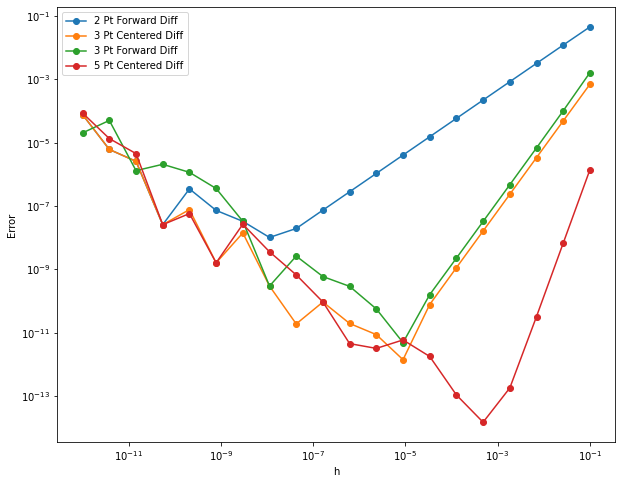

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Approximate the derivative of sin(x)
f   = lambda x : np.sin(x)
trueDerivative = lambda x : np.cos(x)

def twoPointForwardDifferences( f, x, h ):
  """ The simplest, plain vanilla finite difference approx"""
  return ( f(x+h) - f(x) )/h
def threePointForwardDifferences( f, x, h):
  """Eq. (4.4) in the Burden and Faires book"""
  return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def threePointCenteredDifferences( f, x, h ):
  """ Book calls it 3 points, since it sort of includes f(x) """
  return ( f(x+h) - f(x-h) )/(2*h)
def fivePointCenteredDifferences( f, x, h ):
  """ Eq. (4.6) in Burden and Faires book """
  return ( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h) )/(12*h)

# Pick some point x at which we want the derivative
x   = 2.
df      = trueDerivative(x)
twoPointF= lambda h : twoPointForwardDifferences( f, x, h)
threePointC= lambda h : threePointCenteredDifferences( f, x, h)
threePointF= lambda h : threePointForwardDifferences( f, x, h)
fivePointC= lambda h : fivePointCenteredDifferences( f, x, h)

# Pick stepsizes h
hList   = np.logspace(-1,-12,20)

# Plot
plt.figure(figsize=(10,8)) 
plt.loglog( hList, np.abs( df - twoPointF(hList) ), 'o-', label="2 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - threePointC(hList) ), 'o-', label="3 Pt Centered Diff" );
plt.loglog( hList, np.abs( df - threePointF(hList) ), 'o-', label="3 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - fivePointC(hList) ), 'o-', label="5 Pt Centered Diff" )
plt.legend();
plt.xlabel("h");
plt.ylabel("Error");

## So, apply the extrapolation to one of these methods

Start by extrapolating on our simplest 2-pt forward difference formula

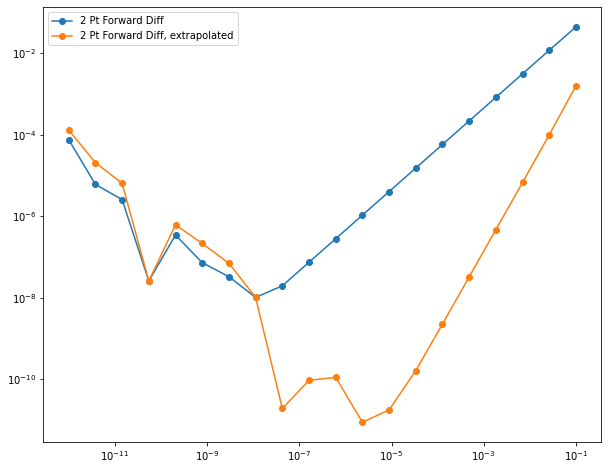

In [17]:
# Todo: what happens if we get the orderOfFormula wrong?
twoPointExtrapolated = lambda h : Extrap( twoPointF, h, orderOfFormula=1)

# Plot
plt.figure(figsize=(10,8)) 
plt.loglog( hList, np.abs( df - twoPointF(hList) ), 'o-', label="2 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - twoPointExtrapolated(hList) ), 'o-', label="2 Pt Forward Diff, extrapolated" );
plt.legend();

Now let's extrapolate on the 3-pt forward difference formula. Note that we need to tell the extrapolation what the order of the 3-pt fd method is

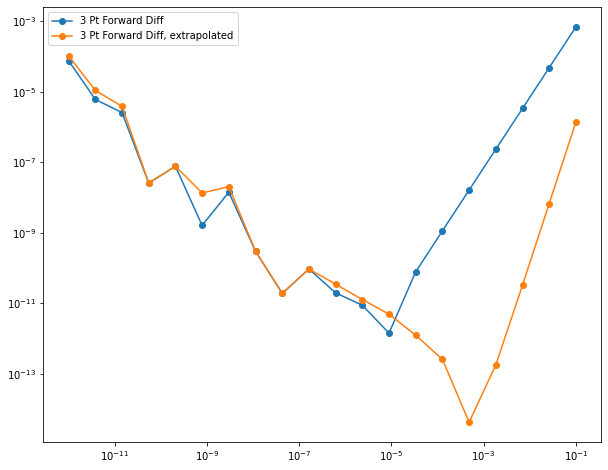

In [18]:
threePointExtrapolated = lambda h : Extrap( threePointC, h, orderOfFormula=2)

# Plot
plt.figure(figsize=(10,8)) 
plt.loglog( hList, np.abs( df - threePointC(hList) ), 'o-', label="3 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - threePointExtrapolated(hList) ), 'o-', label="3 Pt Forward Diff, extrapolated" );
plt.legend();

And let's try a higher order formula

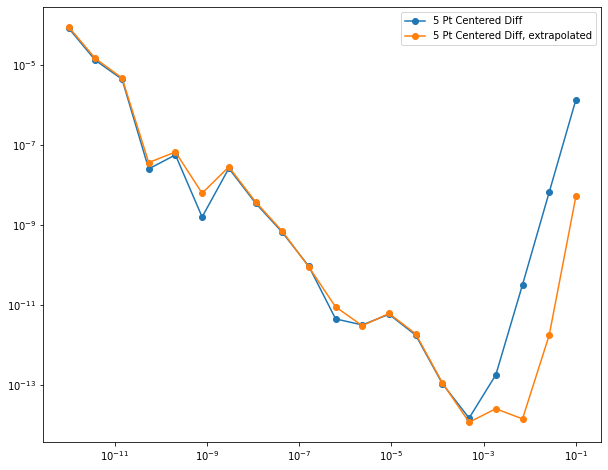

In [19]:
fivePointExtrapolated = lambda h : Extrap( fivePointC, h, orderOfFormula=4)

# Plot
plt.figure(figsize=(10,8)) 
plt.loglog( hList, np.abs( df - fivePointC(hList) ), 'o-', label="5 Pt Centered Diff" );
plt.loglog( hList, np.abs( df - fivePointExtrapolated(hList) ), 'o-', label="5 Pt Centered Diff, extrapolated" );
plt.legend();

note that with the 5 point formula, we see less benefit in extrapolation, mainly because we've already reached machine precision so we can't go any better